In [250]:
import numpy as np
from hmmlearn.hmm import MultinomialHMM
import matplotlib.pyplot as plt

In [251]:
f = open("speaker.txt", "r")
speaker_dataset = f.read()

In [252]:
speaker_dataset

'eoggeggAeggepgpppoppogopppgoppoopegAAoAAAtAtttooepooppteeeeotpopppeeoepooopopgoooepoepotpoegogggggkeggpogopopeAtAttAoApAtttAggeAgegettttAAAAtoeeggeteoAopopotoktttpoepegpgtgAgAeeppeoooopgeggpAAAAgAtgegogoeepAtAtAAotAAAtttAtkAAAtAAktAAAtttAtAAoAtteeoopoAoAtoAAtAAApgeoeeeeoeeegteoAopeAkopgpeAgetAeeotAttAAeAAktttkAptAetAttAkAAAttAAkAAAttAAAAgAgkgogppgooApkpoAopopptotegoAppppAgettgtteAtttAAttAtpoooopopkeogeeettgtAAttAtAtttpopptoAokpopooooAooeoopopptoopgpAAootAtgtpgeeeeegegeAkeAgtoAoAooepgeegegeegekeegtoAAttttttggeegkeegggetgggggeggegeAgpoooktoppoopApoooAtAeAgegegoegeAgpeotppogpoppppoppoppoootAtAAAtApopoopooooopopppopoppoottoopopookAtAAAtettApAtttooAAtteeoAttppeAgtpeegoeeAtoAteeAeeppopekotktetppgpkgktopAAtkkgegttAAtoopopkeAApgoAotteegegeogkoggpAggpkAgAttttAAtAttAteeeopoetAttAtkeoAopgtAtktgtgttopooppgopppppppopeooAptoopopAookApoggtpttttoAoppoopAppoAoppooppptpAooppppppoooAAAtttttttAtteegggeeoeegeoeggkettkAAoAkAAteeggggkAgAtpAAAttAtAAAptAeppAAAopppAApkeeokpeegpppekpegeeeteoopoApoookoogggegekop

In [253]:
len(speaker_dataset)

1000

In [254]:
cMap = {
    "A": 0,
    "e": 1,
    "g": 2,
    "k": 3,
    "o": 4,
    "p": 5,
    "t": 6
}

data = [cMap[i] for i in speaker_dataset]
data = np.array(data)
data = data.reshape(-1, 1) # we reshape for our modelling

In [255]:
# Transition Probabilities
a = np.array([[0.9, 0.05, 0.05], [0.05, 0.9, 0.05], [0.05, 0.05, 0.9]])

# Equal Probabilities for the initial distribution
init_dist = np.array([1,1,1])

In [256]:
m = MultinomialHMM(n_components=3, transmat_prior=a, startprob_prior=init_dist, random_state=42, n_iter=1000)

In [257]:
m = m.fit(data)

In [258]:
hidden_states = m.predict(data)

In [259]:
m.get_stationary_distribution()

array([0.29473124, 0.37612997, 0.3291388 ])

In [260]:
m.transmat_.T

array([[0.86788244, 0.04643528, 0.06524139],
       [0.06717127, 0.91361938, 0.03856388],
       [0.06494629, 0.03994534, 0.89619473]])

In [261]:
m.emissionprob_.T

array([[0.05550318, 0.07364448, 0.4005752 ],
       [0.39525814, 0.0403284 , 0.02252113],
       [0.33302835, 0.0338872 , 0.02574794],
       [0.0506984 , 0.02610359, 0.04282449],
       [0.0719626 , 0.40653037, 0.04836829],
       [0.05958074, 0.38041644, 0.02526226],
       [0.03396858, 0.03908951, 0.43470068]])

In [1]:
x = list(range(1,251))
plt.figure(figsize=(16,5))
plt.stackplot(x, m.predict_proba(data)[1:251,0].T, m.predict_proba(data)[1:251,1].T, m.predict_proba(data)[1:251,2].T, labels=['A','B','C'])
plt.title('Probability of Particular Person Speaking')
plt.xlabel('Time')
plt.ylabel('Probability')
plt.show()

NameError: name 'plt' is not defined

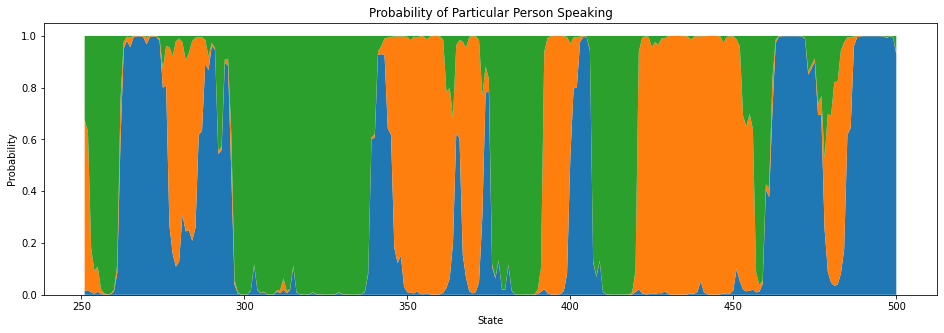

In [285]:
x = list(range(251,501))
plt.figure(figsize=(16,5))
plt.stackplot(x, m.predict_proba(data)[251:501,0].T, m.predict_proba(data)[251:501,1].T, m.predict_proba(data)[251:501,2].T, labels=['A','B','C'])
plt.title('Probability of Particular Person Speaking')
plt.xlabel('State')
plt.ylabel('Probability')
plt.show()

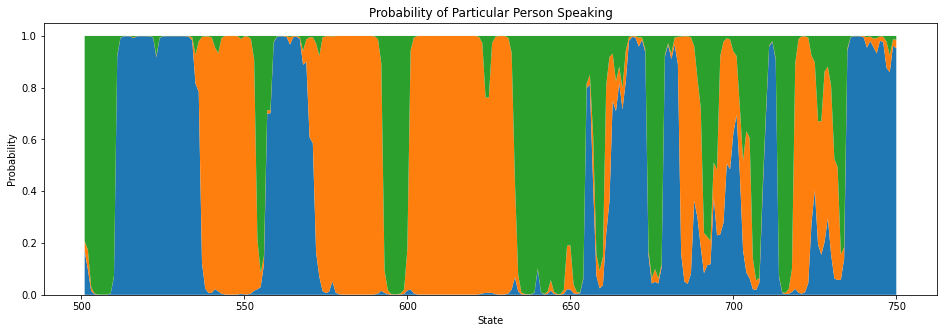

In [286]:
x = list(range(501,751))
plt.figure(figsize=(16,5))
plt.stackplot(x, m.predict_proba(data)[501:751,0].T, m.predict_proba(data)[501:751,1].T, m.predict_proba(data)[501:751,2].T, labels=['A','B','C'])
plt.title('Probability of Particular Person Speaking')
plt.xlabel('State')
plt.ylabel('Probability')
plt.show()

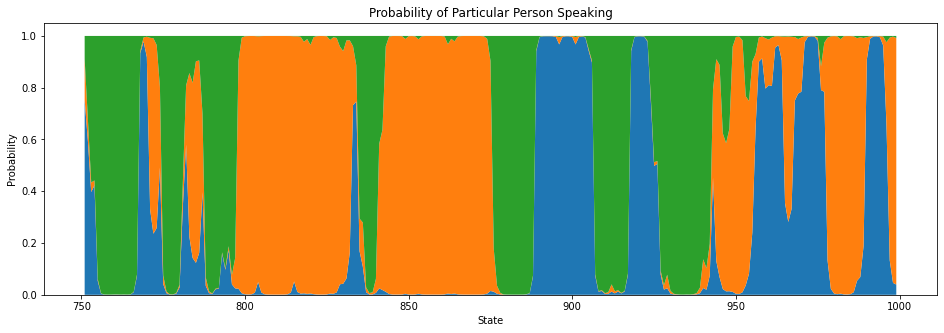

In [287]:
x = list(range(751,1000))
plt.figure(figsize=(16,5))
plt.stackplot(x, m.predict_proba(data)[751:1000,0].T, m.predict_proba(data)[751:1000,1].T, m.predict_proba(data)[751:1000,2].T, labels=['A','B','C'])
plt.title('Probability of Particular Person Speaking')
plt.xlabel('State')
plt.ylabel('Probability')
plt.show()